<a href="https://colab.research.google.com/github/gerv94/MNA-TC4029.10/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Germán Eduardo Rodríguez Vázquez
*   MATRÍCULA: A01796325

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analitica de Datos/Actividad 4"
os.chdir(DIR)

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Mediante simple observación podemos definir que nuetro dataframe contiene 8 columnas numericas (3 flotantes y 5 enteras), y 4 columnas cualitativas

Tambien podemos obtener esta informacion de forma programatica

Columnas numericas

In [191]:
len(df.select_dtypes(include=[np.number]).columns)

8

Columnas cualitativas

In [192]:
len(df.select_dtypes(exclude=[np.number]).columns)

4

 2. Determina el porcentaje de valores faltantes por columna.

In [193]:
df.isnull().mean() * 100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


Solo dos columnas tienen valores faltantes (person_emp_length y loan_int_rate)

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [194]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Tendencia central (media, mediana)

In [195]:
df.describe().T[['mean','50%']].rename(columns={'mean': 'Media', '50%': 'Mediana'})

,Media,Mediana
person_age,27.734600,26.00
person_income,66074.848470,55000.00
person_emp_length,4.789686,4.00
loan_amnt,9589.371106,8000.00
loan_int_rate,11.011695,10.99
loan_status,0.218164,0.00
loan_percent_income,0.170203,0.15
cb_person_cred_hist_length,5.804211,4.00


Dispersión o variabilidad (min, max, desviación estándar, cuartiles)

In [196]:
df.describe().T[['min','max','std','25%','50%','75%']].rename(columns={'min': 'Minimo', 'max': 'Maximo','std': 'Desviacion Estandar','25%': 'Q1','50%': 'Q2','75%': 'Q3'})

,Minimo,Maximo,Desviacion Estandar,Q1,Q2,Q3
person_age,20.00,144.00,6.348078,23.00,26.00,30.00
person_income,4000.00,6000000.00,61983.119168,38500.00,55000.00,79200.00
person_emp_length,0.00,123.00,4.142630,2.00,4.00,7.00
loan_amnt,500.00,35000.00,6322.086646,5000.00,8000.00,12200.00
loan_int_rate,5.42,23.22,3.240459,7.90,10.99,13.47
loan_status,0.00,1.00,0.413006,0.00,0.00,0.00
loan_percent_income,0.00,0.83,0.106782,0.09,0.15,0.23
cb_person_cred_hist_length,2.00,30.00,4.055001,3.00,4.00,8.00


Forma (asimetría y curtosis)

Primero definimis un dataframe con solo valores numericos

In [197]:
dfNum = df.select_dtypes(include=[np.number])
dfNum

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


Asimetría

In [198]:
dfNum.skew()

,0
person_age,2.581393
person_income,32.865349
person_emp_length,2.614455
loan_amnt,1.192477
loan_int_rate,0.208550
loan_status,1.364888
loan_percent_income,1.064669
cb_person_cred_hist_length,1.661790


Curtosis

In [199]:
dfNum.kurt()

,0
person_age,18.560825
person_income,2693.272776
person_emp_length,43.722338
loan_amnt,1.423565
loan_int_rate,-0.671609
loan_status,-0.137088
loan_percent_income,1.223687
cb_person_cred_hist_length,3.716194


Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis

In [200]:
skewness = dfNum[['person_age', 'loan_int_rate']].skew()
kurtosis = dfNum[['person_age', 'loan_int_rate']].kurtosis()

pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

,Skewness,Kurtosis
person_age,2.581393,18.560825
loan_int_rate,0.208550,-0.671609


Dado los resultados:

**person_age**:
* Asimetría (skewness): 2.58, lo que indica que es altamente asimétrica hacia la derecha.
* Curtosis: 18.56, lo que indica que tiene una distribución leptocúrtica (con un pico muy alto).

**loan_int_rate**:
* Asimetría (skewness): 0.21, lo que indica que es aproximadamente simétrica.
* Curtosis: -0.67, lo que indica una distribución platicúrtica (con una forma más achatada).


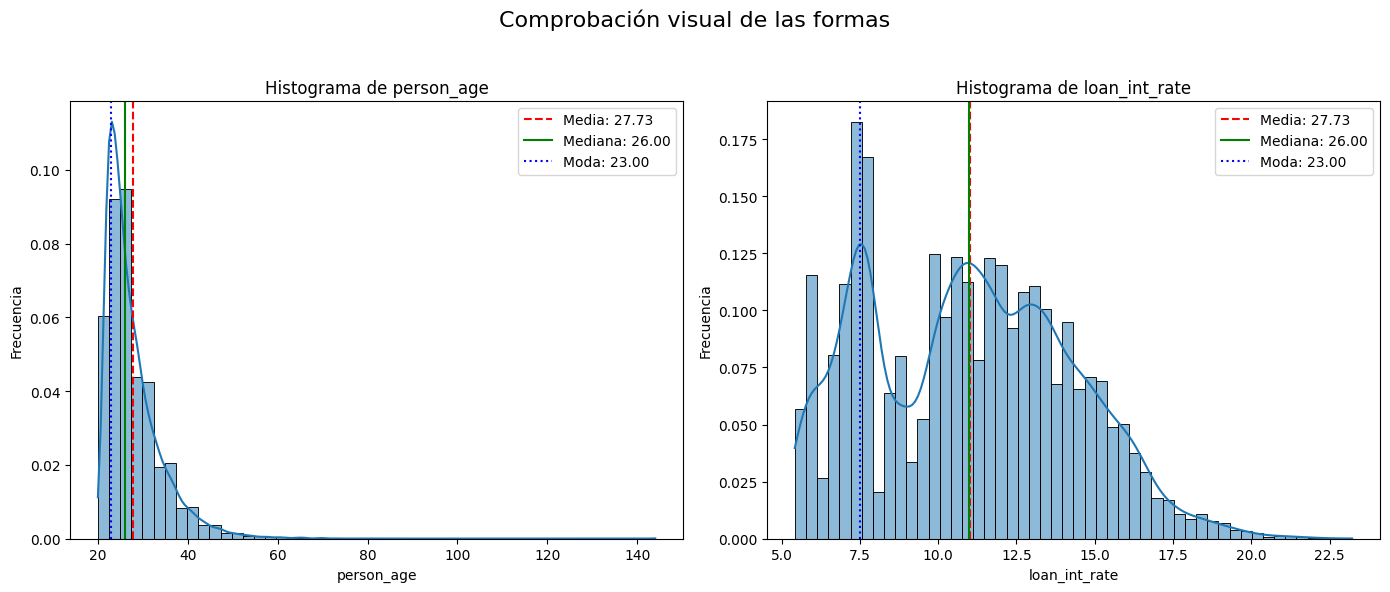

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Calcular estadísticas
age_mean = df['person_age'].mean()
age_median = df['person_age'].median()
age_mode = df['person_age'].mode()[0]

loan_mean = df['loan_int_rate'].mean()
loan_median = df['loan_int_rate'].median()
loan_mode = df['loan_int_rate'].mode()[0]

# Histograma para 'person_age'
plt.subplot(1, 2, 1)
sns.histplot(df['person_age'], kde=True, bins=50, stat="density")
plt.axvline(age_mean, color='red', linestyle='--', label=f'Media: {age_mean:.2f}')
plt.axvline(age_median, color='green', linestyle='-', label=f'Mediana: {age_median:.2f}')
plt.axvline(age_mode, color='blue', linestyle=':', label=f'Moda: {age_mode:.2f}')
plt.title('Histograma de person_age')
plt.xlabel('person_age')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para 'loan_int_rate'
plt.subplot(1, 2, 2)
sns.histplot(df['loan_int_rate'], kde=True, bins=50, stat="density")
plt.axvline(loan_mean, color='red', linestyle='--', label=f'Media: {age_mean:.2f}')
plt.axvline(loan_median, color='green', linestyle='-', label=f'Mediana: {age_median:.2f}')
plt.axvline(loan_mode, color='blue', linestyle=':', label=f'Moda: {age_mode:.2f}')
plt.title('Histograma de loan_int_rate')
plt.xlabel('loan_int_rate')
plt.ylabel('Frecuencia')
plt.legend()

plt.suptitle('Comprobación visual de las formas', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

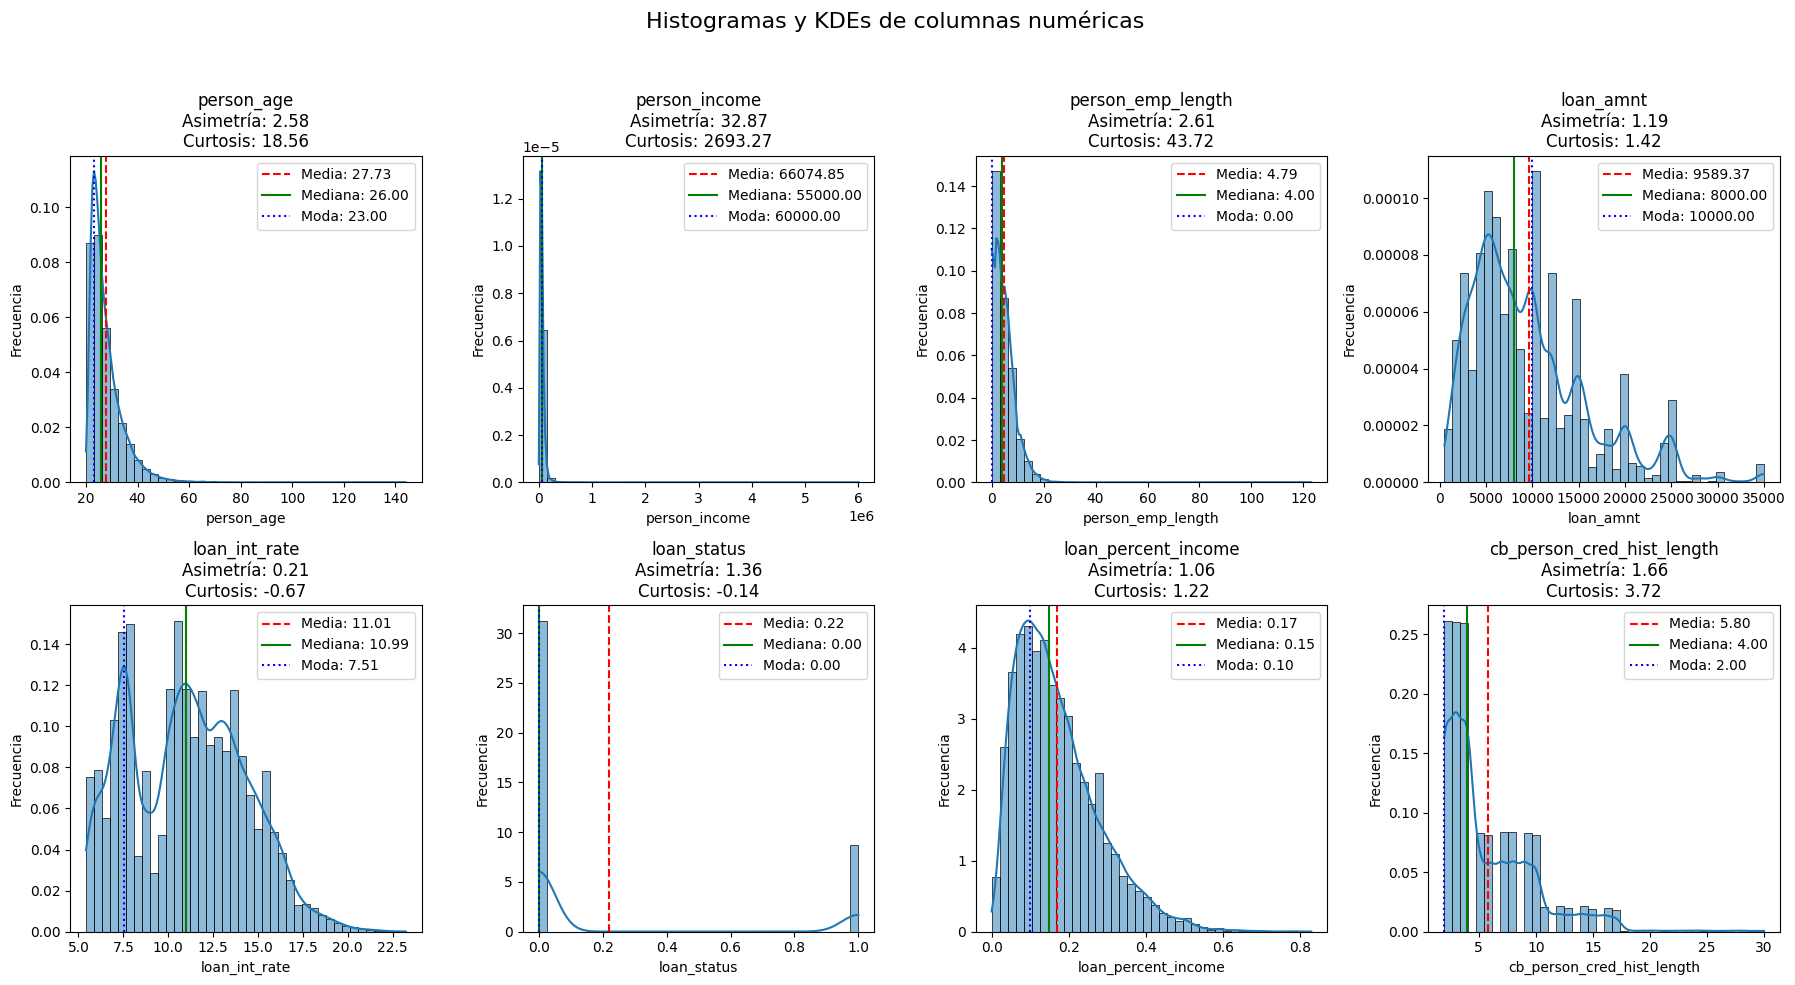

In [202]:
numericColumns = df.select_dtypes(include=[np.number]).columns
numCols = 4
numPlots = len(numericColumns)
numRows = (numPlots - 1) // numCols + 1

fig = plt.subplots(nrows=numRows, ncols=numCols, figsize=(18, 10))
for i, col in enumerate(numericColumns):
    plt.subplot(numRows, numCols, i+1)
    sns.histplot(df[col], kde=True, bins=40, stat="density")
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Mediana: {median:.2f}')
    plt.axvline(mode, color='blue', linestyle=':', label=f'Moda: {mode:.2f}')
    plt.title(f'{col}\nAsimetría: {skewness:.2f}\nCurtosis: {kurtosis:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.suptitle('Histogramas y KDEs de columnas numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

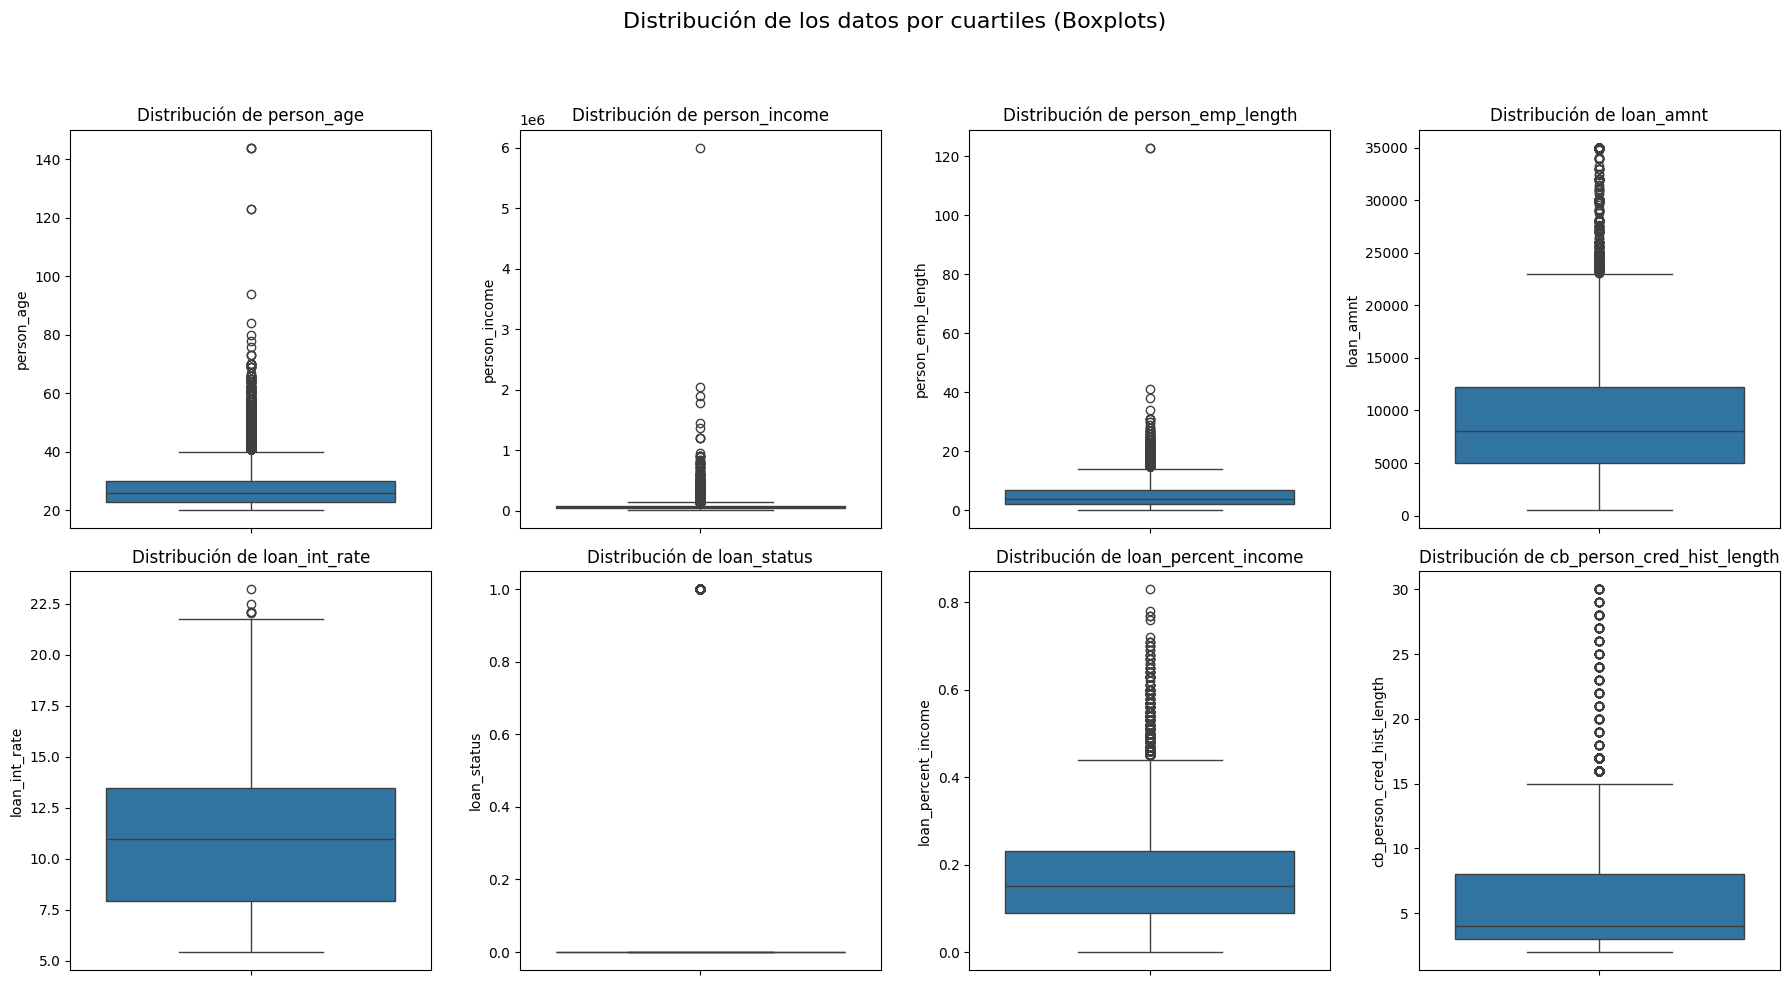

In [203]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig = plt.subplots(nrows=numRows, ncols=numCols, figsize=(18, 10))

for i, col in enumerate(numericColumns):
    plt.subplot(numRows, numCols, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Distribución de {col}')
    plt.ylabel(col)

# Título general para todos los gráficos
plt.suptitle('Distribución de los datos por cuartiles (Boxplots)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [204]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


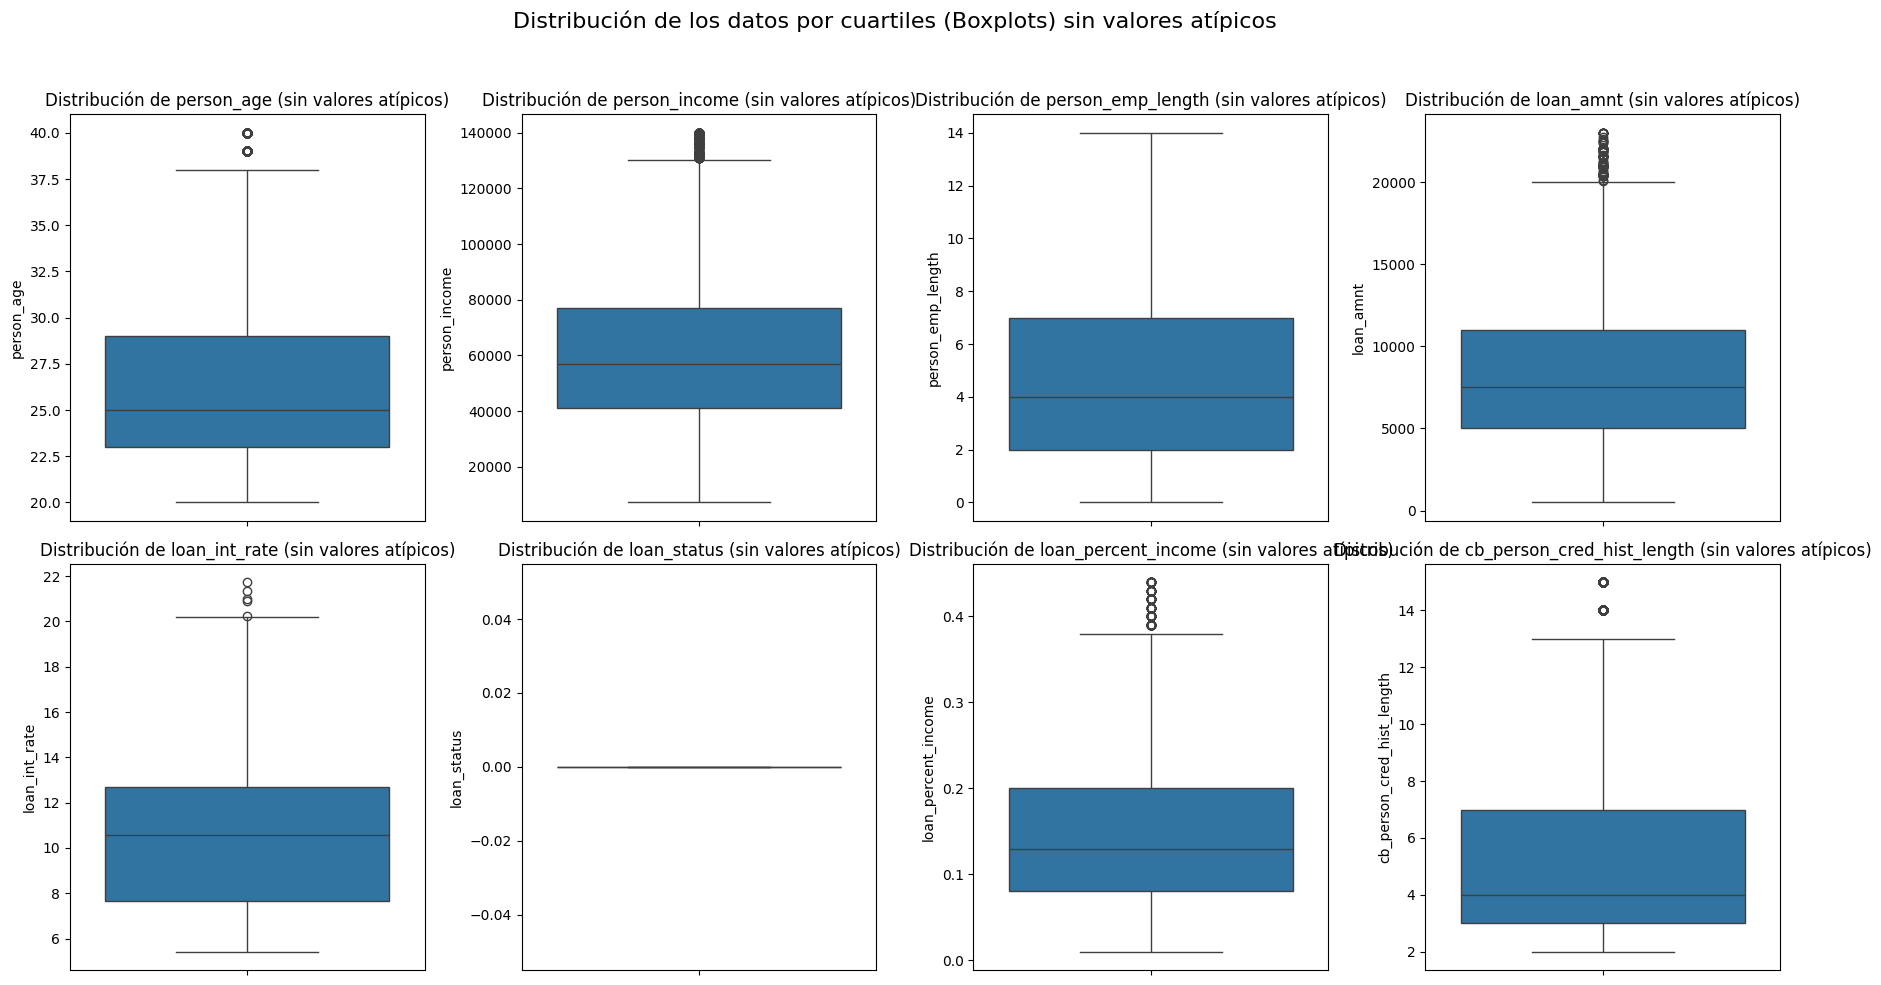

In [205]:
dfNoOutliers = df.copy()

# Remover valores atípicos para cada columna
for col in numericColumns:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upperLimit = percentile75 + 1.5 * iqr
    lowerLimit = percentile25 - 1.5 * iqr
    dfNoOutliers = dfNoOutliers[(dfNoOutliers[col] >= lowerLimit) & (dfNoOutliers[col] <= upperLimit)]

fig = plt.subplots(nrows=numRows, ncols=numCols, figsize=(18, 10))

for i, col in enumerate(numericColumns):
    plt.subplot(numRows, numCols, i+1)
    sns.boxplot(data=dfNoOutliers, y=col)
    plt.title(f'Distribución de {col} (sin valores atípicos)')
    plt.ylabel(col)

plt.suptitle('Distribución de los datos por cuartiles (Boxplots) sin valores atípicos', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [206]:
df.describe(include='object').T.rename(columns={'top': 'Moda', 'unique': 'Cardinalidad', 'freq': 'Recuento'})

,count,Cardinalidad,Moda,Recuento
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [207]:
cualitativeColumns = df.select_dtypes(exclude=[np.number]).columns

print("\nRecuentos únicos (número de ocurrencias para cada valor único) por columna:")
for col in cualitativeColumns:
    print(f"\nRecuentos únicos para '{col}':")
    print(df[col].value_counts())
    print()


Recuentos únicos (número de ocurrencias para cada valor único) por columna:

Recuentos únicos para 'person_home_ownership':
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


Recuentos únicos para 'loan_intent':
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


Recuentos únicos para 'loan_grade':
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


Recuentos únicos para 'cb_person_default_on_file':
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64



7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

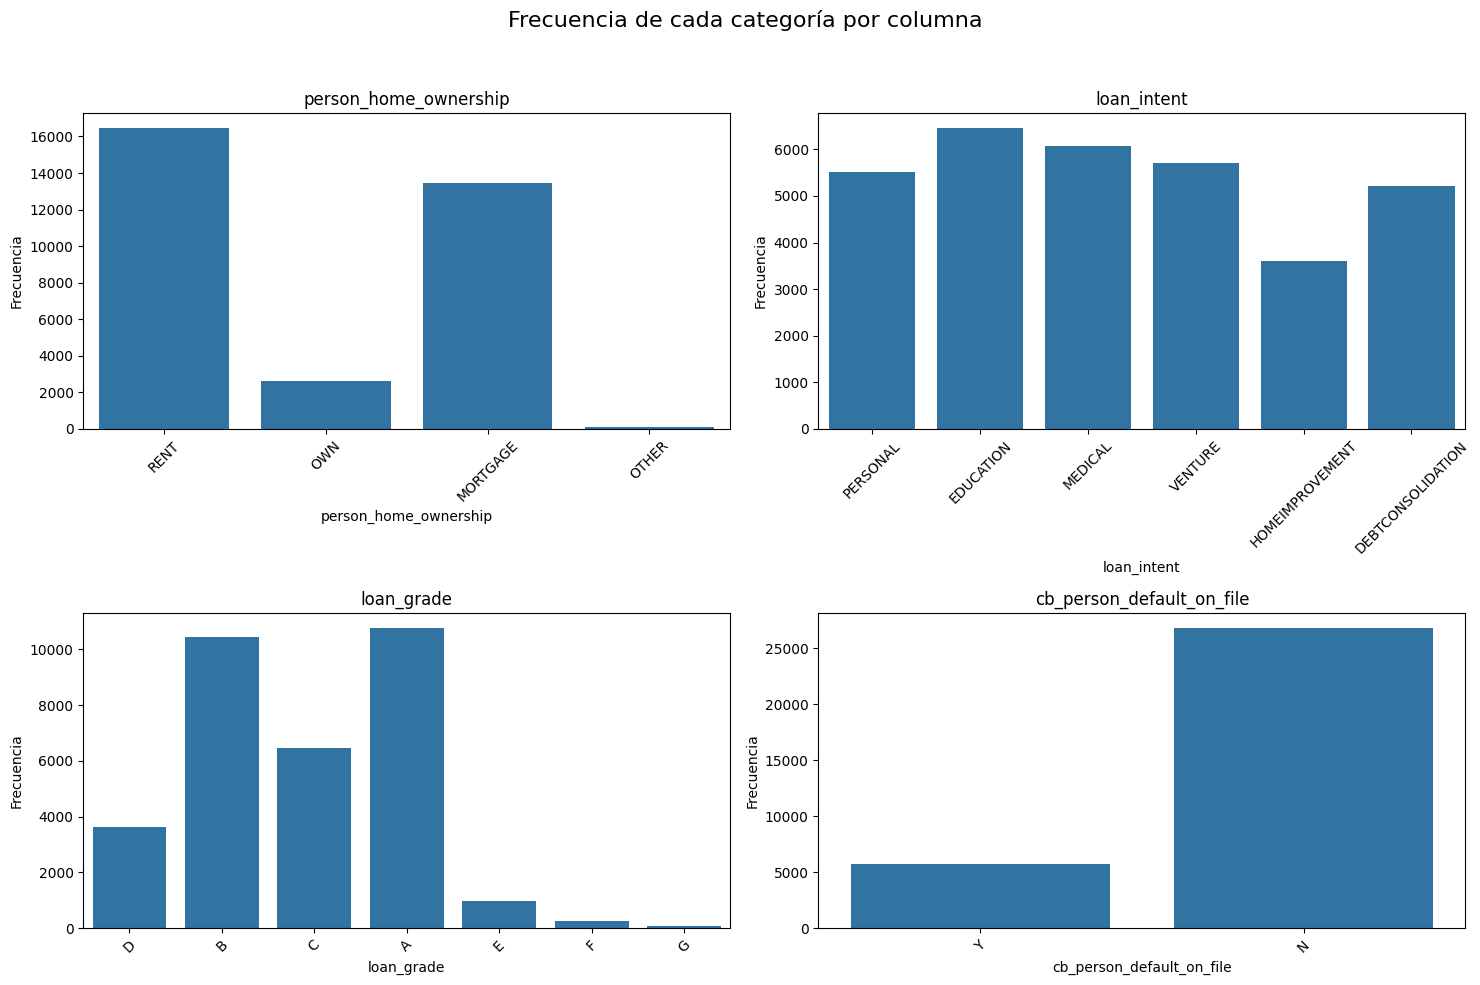

In [208]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cualitativeColumns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.suptitle('Frecuencia de cada categoría por columna', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

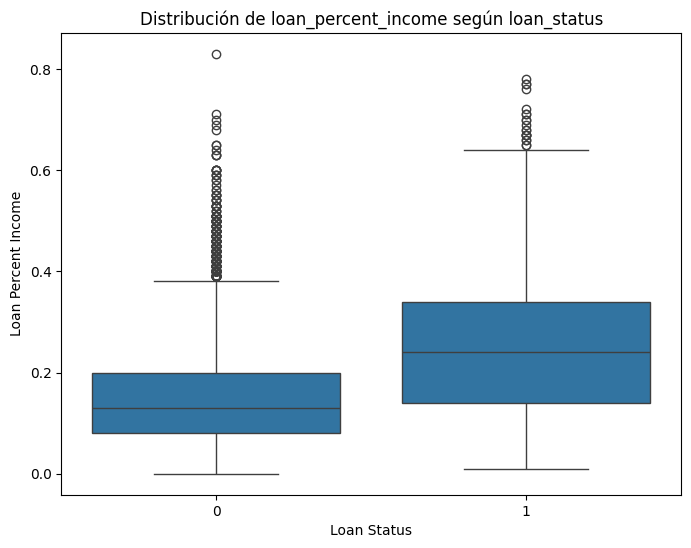

In [209]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='loan_status', y='loan_percent_income', data=df)

plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')

plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

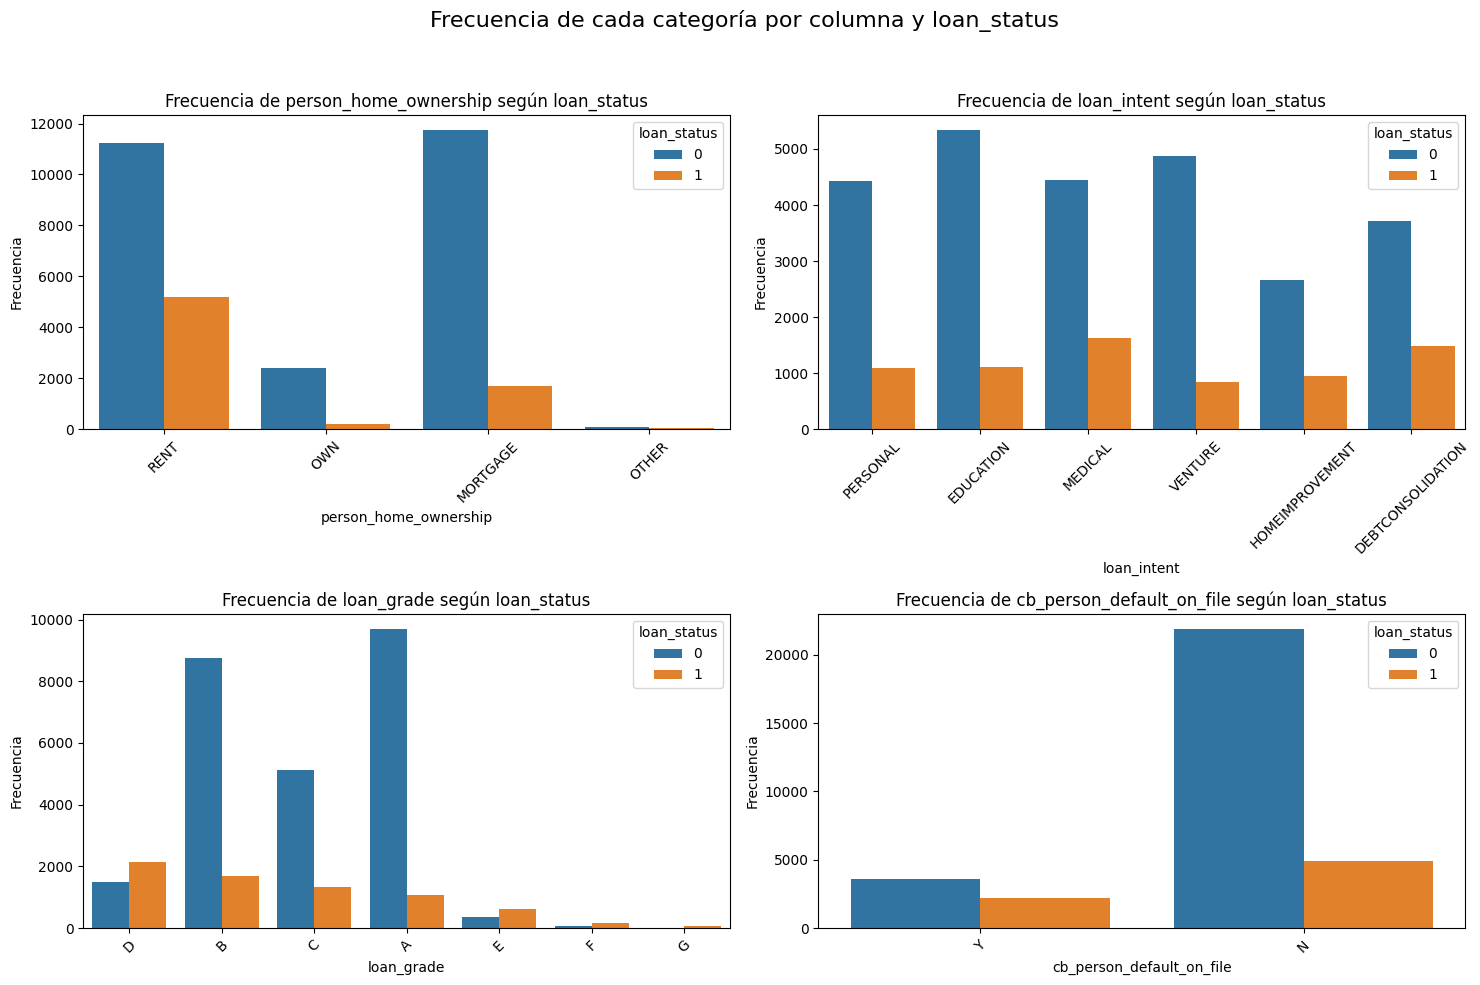

In [210]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cualitativeColumns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, hue='loan_status')
    plt.title(f'Frecuencia de {col} según loan_status')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.suptitle('Frecuencia de cada categoría por columna y loan_status', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

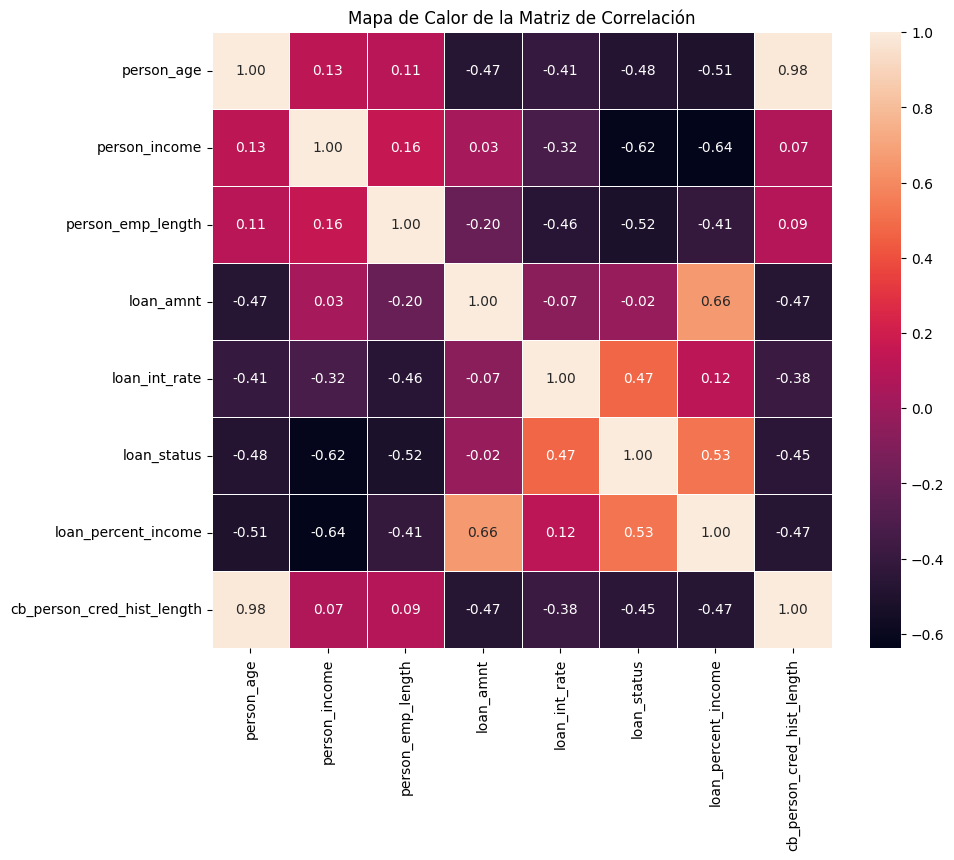

In [211]:
correlationMatrix = df.corr(numeric_only=True).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Visualmente podemos decir que loan_percent_income es la variable con mayor correlacion con loan_status

Tambien se pede obtener de forma programatica

In [212]:
correlation = correlationMatrix['loan_status'].drop('loan_status')
highestCorrelation = correlation.idxmax()
highestValue = correlation.max()

print(f"La variable con mayor correlación con loan_status es '{highestCorrelation}' con un valor de correlación de {highestValue:.2f}.")


La variable con mayor correlación con loan_status es 'loan_percent_income' con un valor de correlación de 0.53.


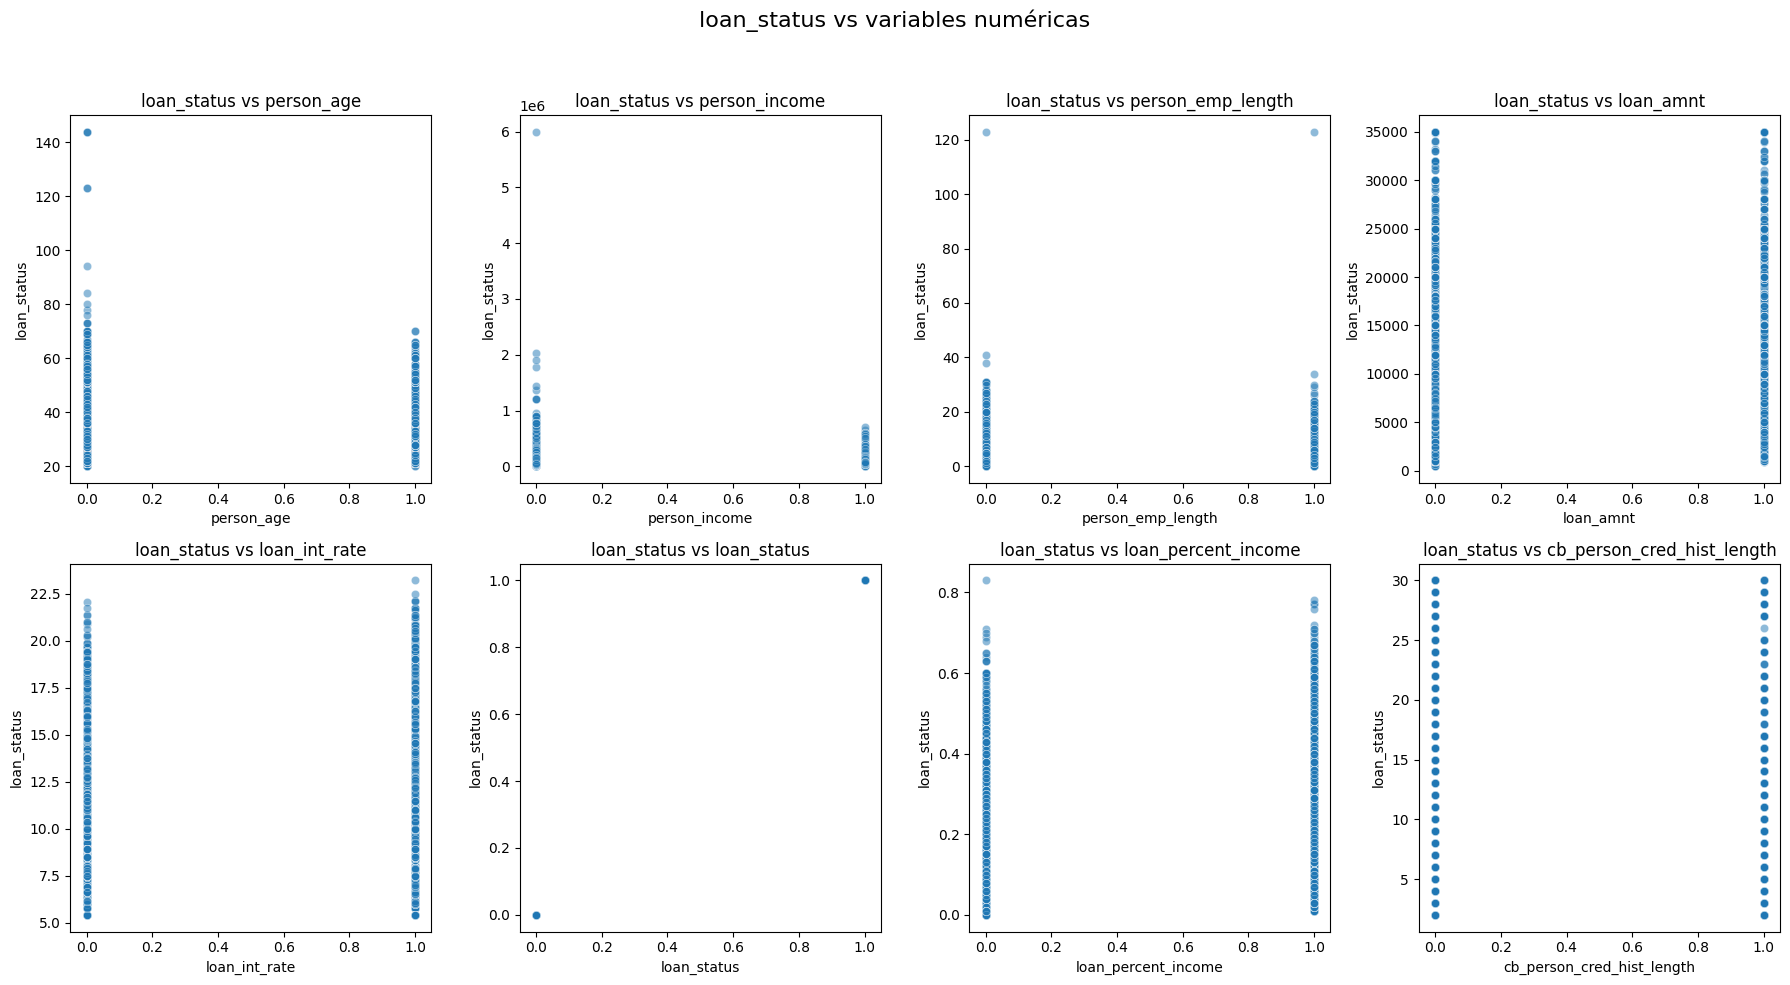

In [213]:
fig = plt.subplots(nrows=numRows, ncols=numCols, figsize=(18, 10))

for i, col in enumerate(numericColumns):
    plt.subplot(numRows, numCols, i+1)
    sns.scatterplot(x='loan_status', y=col, data=df, alpha=0.5)
    plt.title(f'loan_status vs {col}')
    plt.xlabel(col)
    plt.ylabel('loan_status')

plt.suptitle('loan_status vs variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Tambien podemos corroboral la correlación de todas las variables:

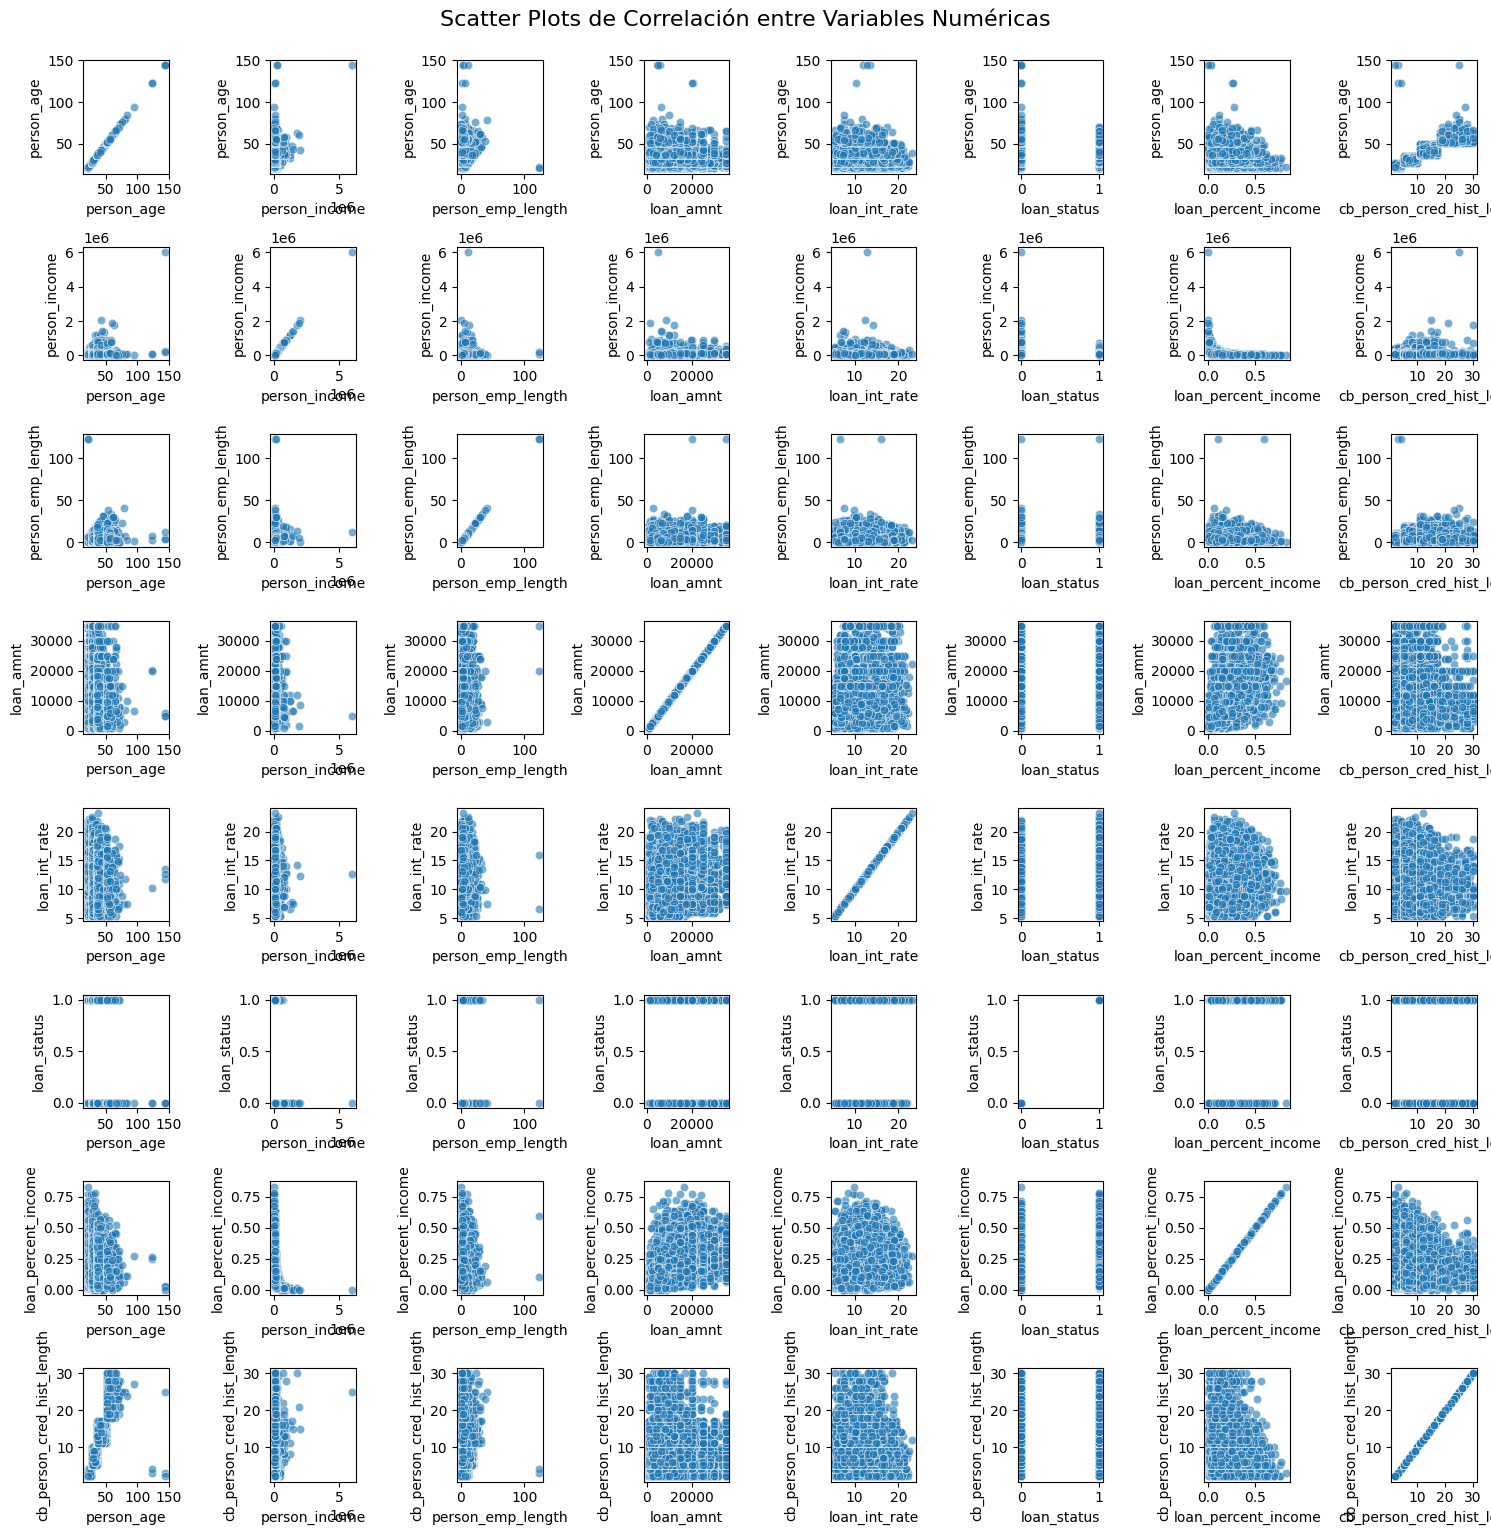

In [214]:
import itertools

column_pairs = list(itertools.product(numericColumns, repeat=2))

plt.figure(figsize=(15, 15))

for i, (col1, col2) in enumerate(column_pairs, 1):
    plt.subplot(8, 8, i)
    sns.scatterplot(data=df, x=col2, y=col1, alpha=0.6)
    plt.xlabel(col2)
    plt.ylabel(col1)

plt.tight_layout()
plt.suptitle('Scatter Plots de Correlación entre Variables Numéricas', y=1.02, fontsize=16)
plt.show()